In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
from DB.DBHandler import DBHelper

In [2]:
db = DBHelper()

In [3]:
df = pd.read_sql_query(
    """
    SELECT Pointer.date_start, Pointer.date_end, Workers.name, Workers.id_category, Workers.score  FROM Pointer 
    LEFT JOIN Workers ON 
    Pointer.id_worker = Workers._id""", db.conn)


In [4]:
df.date_start = pd.to_datetime(df.date_start)
df.date_end = pd.to_datetime(df.date_end)


In [5]:
df.dtypes

date_start     datetime64[ns]
date_end       datetime64[ns]
name                   object
id_category           float64
score                 float64
dtype: object

In [6]:
df.loc[
    df.date_start >= pd.to_datetime("2022-04-15"),
    :]


,date_start,date_end,name,id_category,score
319,2022-04-15 19:12:33,2022-04-15 19:15:29,Administrator,1.0,3.510364e+09
320,2022-04-15 19:15:41,2022-04-15 19:19:47,Administrator,1.0,3.510364e+09
321,2022-04-15 19:19:59,2022-04-15 19:20:31,Administrator,1.0,3.510364e+09
322,2022-04-15 19:22:51,2022-04-15 19:23:03,Administrator,1.0,3.510364e+09
323,2022-04-15 19:24:56,2022-04-15 19:27:05,Administrator,1.0,3.510364e+09
...,...,...,...,...,...
422,2022-04-17 03:40:38,2022-04-17 03:41:01,Administrator,1.0,3.510364e+09
423,2022-04-17 03:41:08,2022-04-17 03:41:27,Lablack Mourad,1.0,3.000000e+02
424,2022-04-17 03:41:08,2022-04-17 03:41:31,Lablack Mourad,1.0,3.000000e+02
425,2022-04-18 22:54:17,2022-04-18 22:59:49,Administrator,1.0,3.510364e+09


In [7]:
df

,date_start,date_end,name,id_category,score
0,2022-02-24 21:40:18,2022-02-24 21:41:02,Administrator,1.0,3.510364e+09
1,2022-02-24 21:41:29,2022-02-24 21:42:27,Administrator,1.0,3.510364e+09
2,2022-02-24 21:42:44,2022-02-24 21:42:52,Administrator,1.0,3.510364e+09
3,2022-02-24 21:43:26,2022-02-24 21:43:49,Administrator,1.0,3.510364e+09
4,2022-02-24 21:44:06,2022-02-24 21:45:02,Administrator,1.0,3.510364e+09
...,...,...,...,...,...
422,2022-04-17 03:40:38,2022-04-17 03:41:01,Administrator,1.0,3.510364e+09
423,2022-04-17 03:41:08,2022-04-17 03:41:27,Lablack Mourad,1.0,3.000000e+02
424,2022-04-17 03:41:08,2022-04-17 03:41:31,Lablack Mourad,1.0,3.000000e+02
425,2022-04-18 22:54:17,2022-04-18 22:59:49,Administrator,1.0,3.510364e+09


In [8]:

test = df.set_index("date_start")
test.index.day_name()
test.groupby(test.index.day_name()).mean()


,id_category,score
date_start,,
Friday,1.000000,3.510364e+09
Monday,1.000000,3.510364e+09
Saturday,1.011905,3.468574e+09
Sunday,1.272727,1.914748e+09
Thursday,1.000000,3.510364e+09
Tuesday,1.031250,3.400666e+09
Wednesday,1.022222,2.769288e+09


<AxesSubplot:>

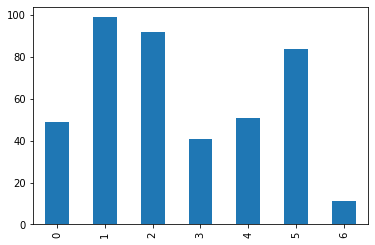

In [9]:
df.date_start.dt.weekday.value_counts().sort_index().plot(kind="bar")


<AxesSubplot:ylabel='date_start'>

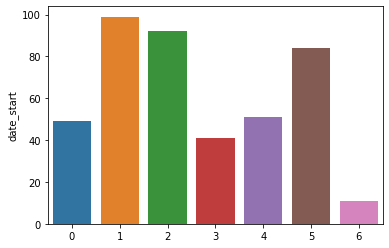

In [10]:
sns.barplot(data=df, x=df.date_start.dt.weekday.value_counts().sort_index().index,
            y=df.date_start.dt.weekday.value_counts().sort_index())


In [11]:
for d in df.date_start.dt.day_name:
    print(d)

TypeError: 'method' object is not iterable

In [12]:

df['duration'] = df.date_end - df.date_start


In [19]:
df[["name", "duration"]].groupby(['name']).sum().sort("duration")


AttributeError: 'DataFrame' object has no attribute 'sort'

<AxesSubplot:xlabel='name'>

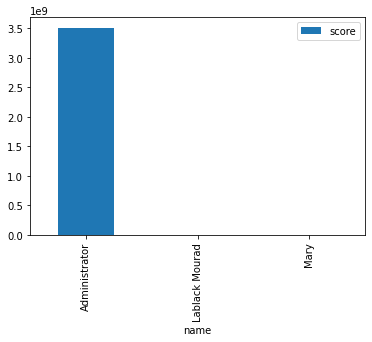

In [13]:
df[["name", "score"]].groupby(['name']).mean().plot(kind='bar')


In [14]:
np.vstack([df[["name", "duration"]].groupby(['name']).sum().index.values, np.squeeze(df[["name", "duration"]].groupby(['name']).sum().values)])


NameError: name 'np' is not defined

In [38]:
df[["name", 'score']].groupby(['name']).sum().values


array([[1.33013443e+12],
       [5.10000000e+03],
       [9.75000000e+04]])

In [51]:
ranking = df[["name", "duration"]].groupby(['name']).sum()
ranking_score = df[["name", 'score']].groupby(['name']).sum()
for m, t, s in zip(ranking.index, ranking['duration'], ranking_score['score']):
    print(
        m, f"days: {t.components.}\nhours: {t.components.hours}\nminutes{t.components.minutes}", round(t.value/s, 2))


Administrator days: 1
hours: 8
minutes33 88.11 1330134432980.0
Lablack Mourad days: 0
hours: 0
minutes42 504117647.06 5100.0
Mary days: 0
hours: 0
minutes28 17456410.26 97500.0


In [17]:
for t in (df[["name", "duration"]].groupby(['name']).sum()
             ['duration']).values:
    print(t)


117192000000000 nanoseconds
2571000000000 nanoseconds
1702000000000 nanoseconds


# Sells

In [85]:
df_sells = pd.read_sql_query(
    """
    SELECT Sells.date, Sells.total, Workers.name AS employee, Customers.name AS customer
    FROM Sells LEFT JOIN Workers 
    ON Sells.id_worker = Workers._id
    LEFT JOIN Customers on Sells.id_customer = Customers._id
    WHERE Sells.date BETWEEN '2022-04-01' AND '2022-04-17'
    """, db.conn)
df_sells.set_index(pd.to_datetime(df_sells.date), inplace=True)
df_sells["day"] = df_sells.index.day_name()
df_sells["date"] = df_sells.index.date
df_sells


,date,total,employee,customer,day
date,,,,,
2022-04-06 00:11:48,2022-04-06,300.0,Administrator,Unknown,Wednesday
2022-04-06 00:12:15,2022-04-06,450.0,Administrator,Unknown,Wednesday
2022-04-06 00:59:32,2022-04-06,1250.0,Administrator,Unknown,Wednesday
2022-04-06 01:02:46,2022-04-06,750.0,Administrator,Unknown,Wednesday
2022-04-06 16:54:38,2022-04-06,2751.0,Administrator,Unknown,Wednesday
2022-04-16 04:02:28,2022-04-16,135.0,Administrator,Unknown,Saturday
2022-04-16 04:06:36,2022-04-16,9.0,Administrator,Unknown,Saturday
2022-04-16 09:19:44,2022-04-16,7500.0,Administrator,Mustafa,Saturday
2022-04-16 09:20:31,2022-04-16,7500.0,Mary,Mustafa,Saturday


<AxesSubplot:xlabel='day', ylabel='count'>

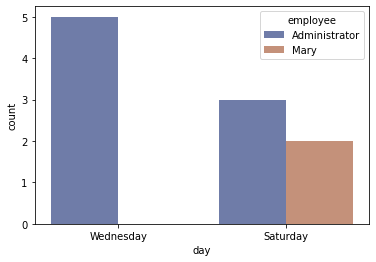

In [93]:
sns.countplot(data=df_sells, x="day", hue="employee", palette="dark", alpha=.6)


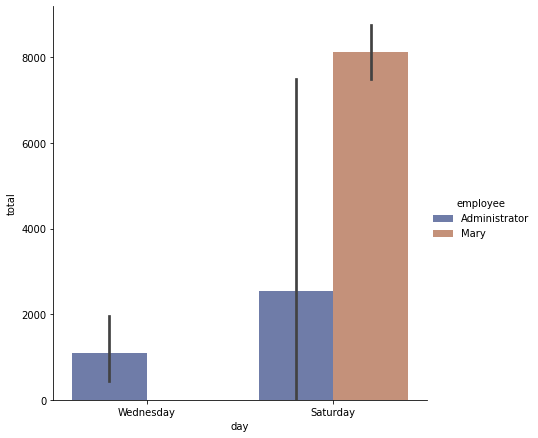

In [89]:
sns.catplot(data=df_sells, x="day", y="total",
            kind="bar", hue="employee", palette="dark", alpha=.6, height=6)


In [44]:
df_sells.date = pd.to_datetime(df_sells.date)
df_sells = df_sells.set_index('date')

In [52]:
df_sells

,_id,id_worker,id_customer,total,completed
date,,,,,
2022-04-06 00:11:48,2,1,1,300.0,0
2022-04-06 00:12:15,3,1,1,450.0,0
2022-04-06 00:59:32,4,1,1,1250.0,0
2022-04-06 01:02:46,5,1,1,750.0,0
2022-04-06 16:54:38,8,1,1,2751.0,0
2022-04-16 04:02:28,11,1,1,135.0,1
2022-04-16 04:06:36,14,1,1,9.0,1
2022-04-16 09:19:44,24,1,3,7500.0,1
2022-04-16 09:20:31,25,3,3,7500.0,1


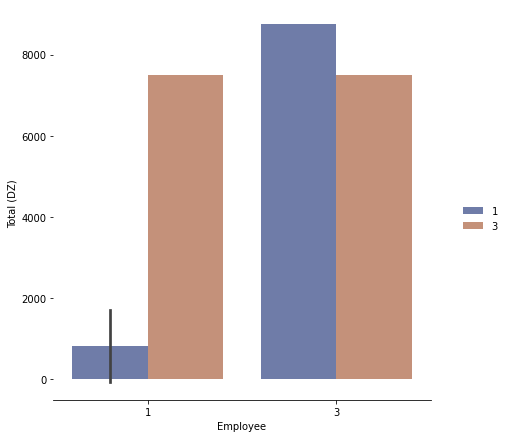

In [58]:
g = sns.catplot(
    data=df_sells, kind="bar",
    x="id_worker", y="total", hue="id_customer",
    ci="sd", palette="dark", alpha=.6, height=6
)
g.despine(left=True)
g.set_axis_labels("Employee", "Total (DZ)")
g.legend.set_title("")


In [64]:
df_sells['day'] = df_sells.index.day_name()

In [65]:
df_sells

,_id,id_worker,id_customer,total,completed,day
date,,,,,,
2022-04-06 00:11:48,2,1,1,300.0,0,Wednesday
2022-04-06 00:12:15,3,1,1,450.0,0,Wednesday
2022-04-06 00:59:32,4,1,1,1250.0,0,Wednesday
2022-04-06 01:02:46,5,1,1,750.0,0,Wednesday
2022-04-06 16:54:38,8,1,1,2751.0,0,Wednesday
2022-04-16 04:02:28,11,1,1,135.0,1,Saturday
2022-04-16 04:06:36,14,1,1,9.0,1,Saturday
2022-04-16 09:19:44,24,1,3,7500.0,1,Saturday
2022-04-16 09:20:31,25,3,3,7500.0,1,Saturday


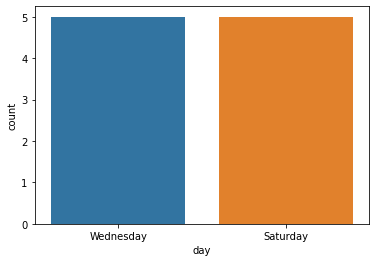

In [67]:
sns.countplot(x="day", data=df_sells)
g.set_axis_labels("Day of the week", "Number of orders")


<AxesSubplot:xlabel='id_worker'>

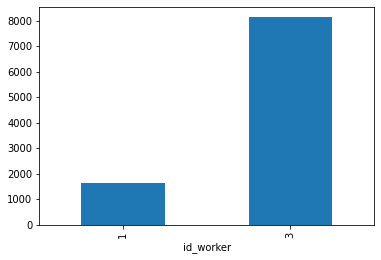

In [56]:
df_sells['total'].groupby(df_sells.id_worker).mean().plot(kind="bar")


<AxesSubplot:>

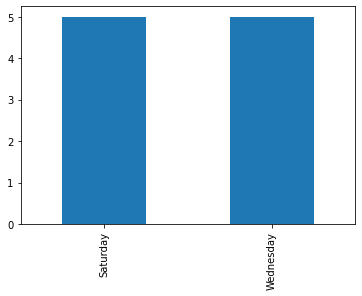

In [51]:
df_sells.index.day_name().value_counts().plot(kind="bar")